In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


In [2]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense,Activation, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [3]:
#loading dataset
test = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#converting the dataframe into numpy array
train= train.values

#dividng the data set into features and target and standardising by dividing 255
x = train[:,1:].reshape(-1,28,28,1)/255.0 #feature
y = train[:,0].astype(np.int32) # target

In [6]:
outfit_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

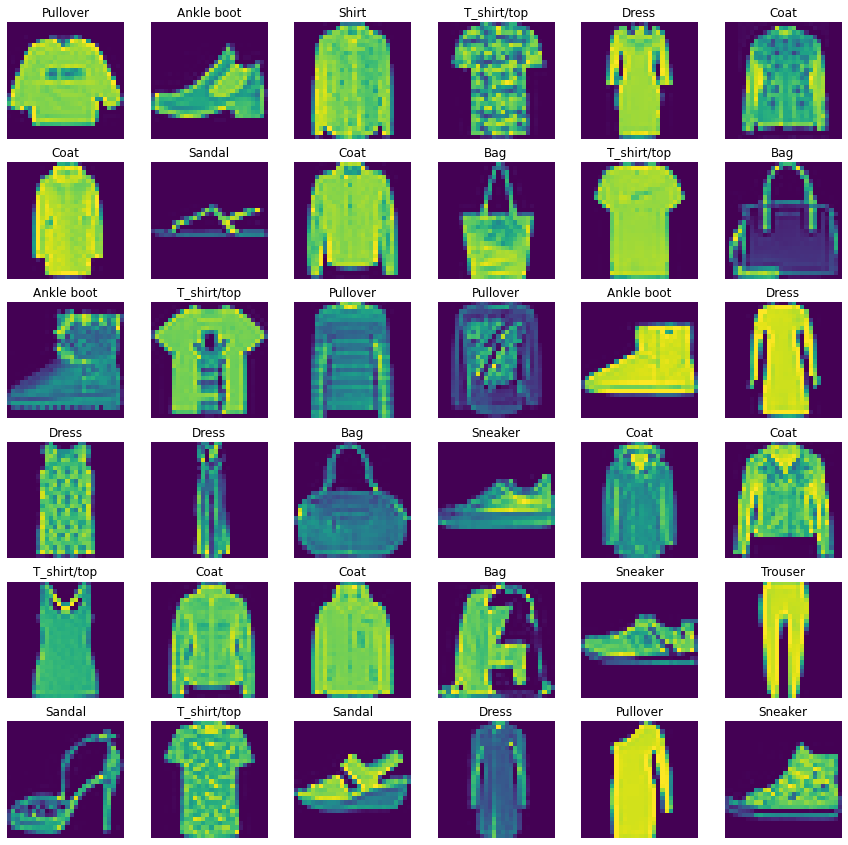

In [7]:
#data visulisation 

plt.figure(figsize=(15, 15))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.axis("off")
    plt.imshow(x[i].reshape((28,28)))
    target = y[i]
    plt.title(outfit_names[target])
plt.show()

In [8]:
#converting into caetgorical varaible
from keras.utils import to_categorical
y = to_categorical(y)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation, Conv2D, MaxPool2D, Flatten

## Training model with dropout and early stopping

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
#Building a Model
model = Sequential()

#adding layer
model.add(Conv2D(input_shape = (28,28,1), filters = 64, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())

#adding layer
model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())



#flatting and adding dense layer
model.add(Flatten())
model.add(Dense(units=512))
model.add(Activation ("relu"))
model.add(Dropout(.5))
model.add(Dense(units = 10 ))
model.add(Activation ("softmax"))

#compling model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


early_stop = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience = 3)

In [12]:
model.fit(x,y, validation_split = 0.3, epochs = 30, batch_size=32,callbacks = [early_stop])

Epoch 1/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.4970 - accuracy: 0.8188 - val_loss: 0.3646 - val_accuracy: 0.8648
Epoch 2/30
1313/1313 [==============================] - 64s 49ms/step - loss: 0.3289 - accuracy: 0.8783 - val_loss: 0.2838 - val_accuracy: 0.8966
Epoch 3/30
1313/1313 [==============================] - 58s 44ms/step - loss: 0.2789 - accuracy: 0.8974 - val_loss: 0.2613 - val_accuracy: 0.9067
Epoch 4/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.2476 - accuracy: 0.9071 - val_loss: 0.2541 - val_accuracy: 0.9091
Epoch 5/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.2165 - accuracy: 0.9179 - val_loss: 0.2487 - val_accuracy: 0.9105
Epoch 6/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.1974 - accuracy: 0.9264 - val_loss: 0.2750 - val_accuracy: 0.9024
Epoch 7/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.1755 - accuracy: 0.9342 - val_loss: 0.2519 -

In [13]:
loss = pd.DataFrame(model.history.history)

In [14]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.496953,0.818810,0.364595,0.864833
1,0.328932,0.878286,0.283782,0.896611
2,0.278873,0.897429,0.261297,0.906722
3,0.247563,0.907119,0.254101,0.909056
4,0.216464,0.917857,0.248684,0.910500
5,0.197397,0.926405,0.274975,0.902389
6,0.175479,0.934167,0.251878,0.911333
7,0.157469,0.940619,0.255584,0.914000


Text(0.5, 1.0, 'Train - Accuracy')

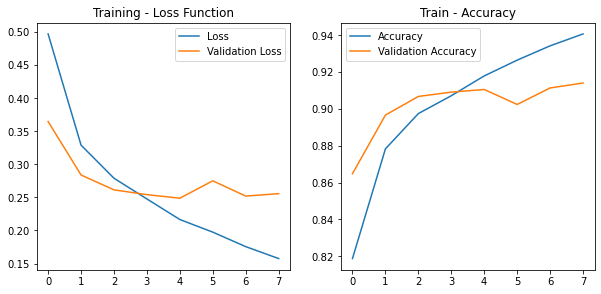

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(loss['loss'], label='Loss')
plt.plot(loss['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(loss['accuracy'], label='Accuracy')
plt.plot(loss['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# Testing the model on test data

In [16]:
#converting the dataframe into numpy array
test= test.values

#dividng the data set into features and target and standardising by dividing 255
x = test[:,1:].reshape(-1,28,28,1)/255.0 #feature
y = test[:,0].astype(np.int32) # target


In [17]:
#making predictions
predictions = model.predict_classes(x)

In [18]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y, predictions,target_names = outfit_names))

              precision    recall  f1-score   support

 T_shirt/top       0.87      0.87      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.89      0.86      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.80      0.74      0.76      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



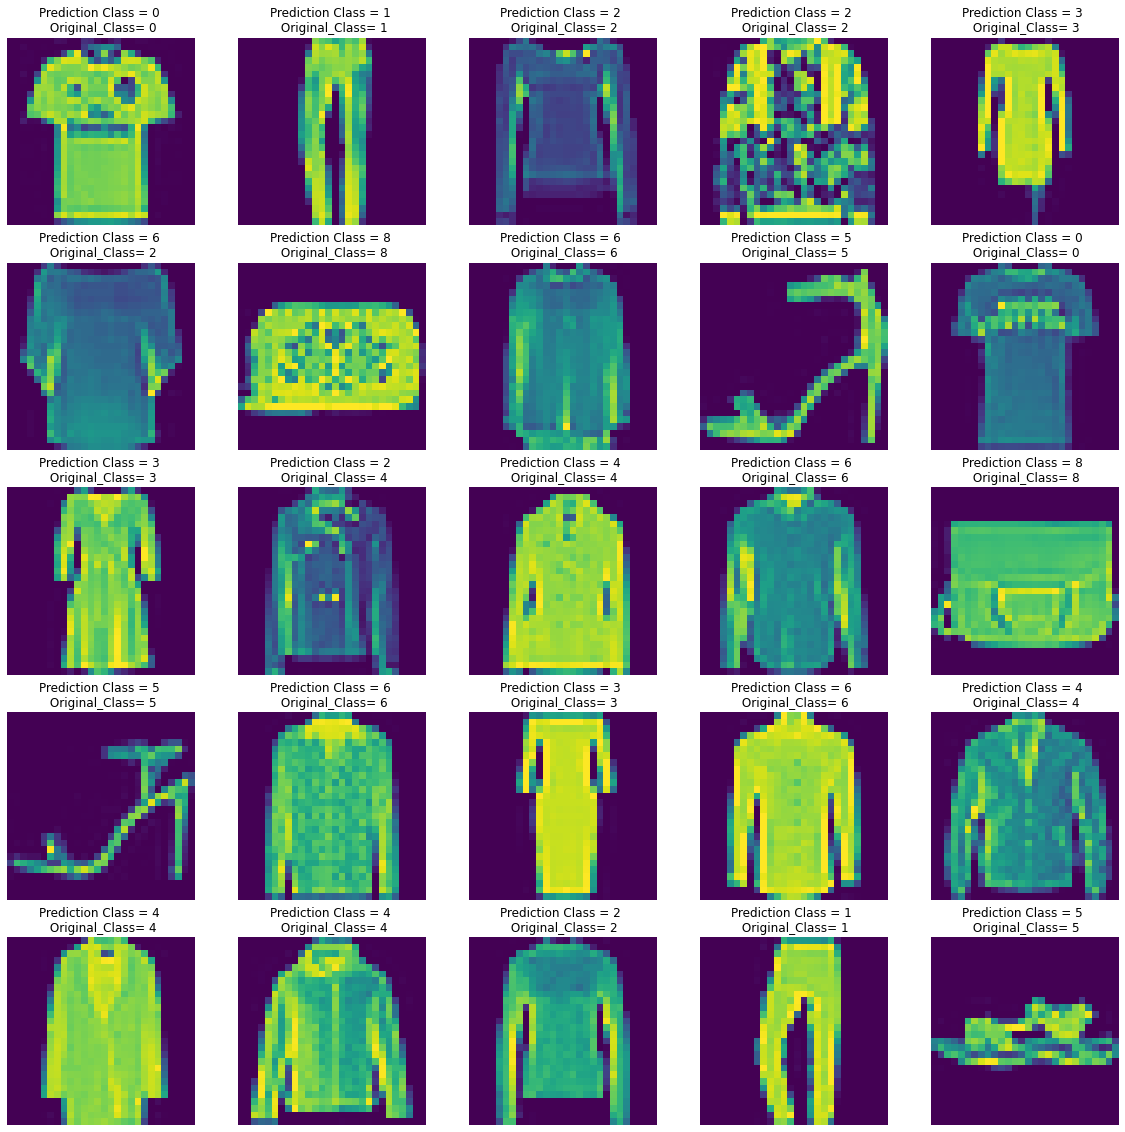

In [19]:
#data visulisation with prediction and actual class label
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(x[i].reshape((28,28)))
    plt.title(f"Prediction Class = {predictions[i]} \n Original_Class= {y[i]}")
plt.show()

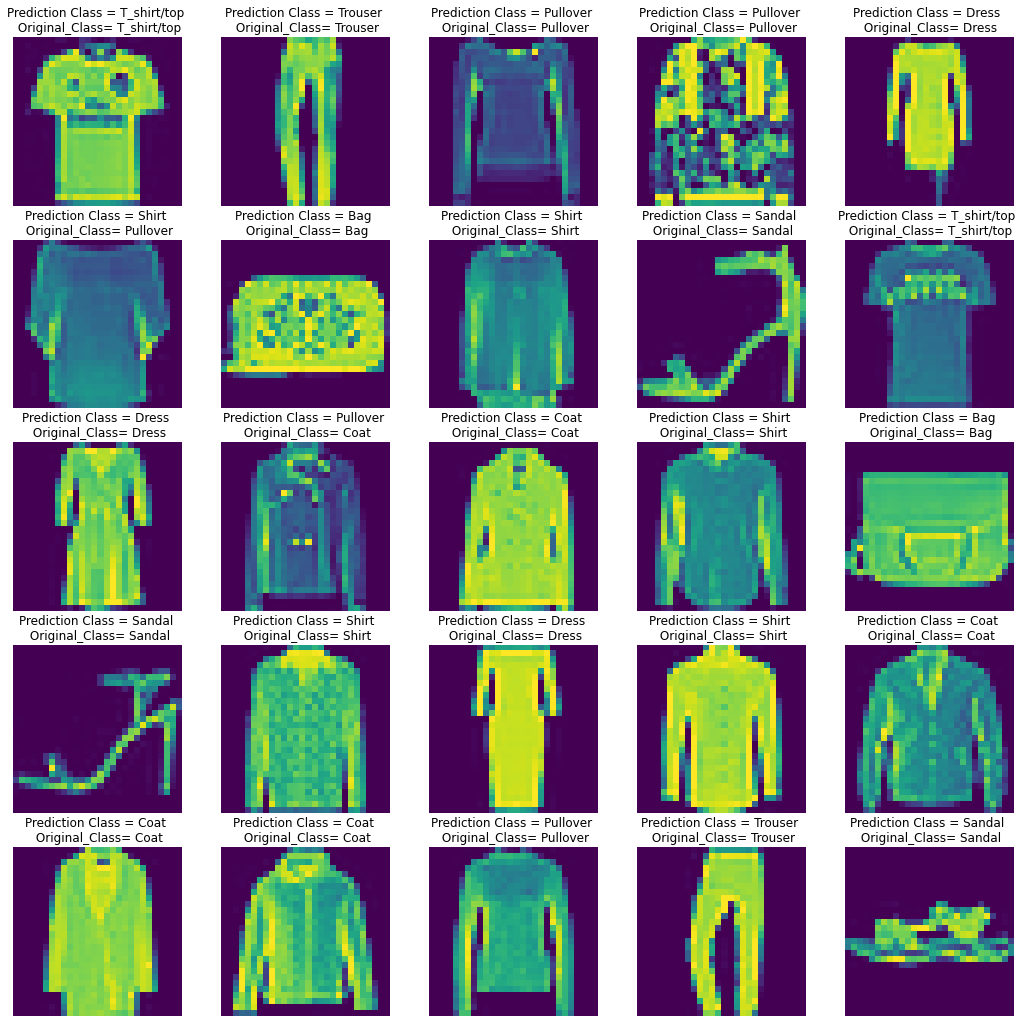

In [20]:
#data visulisation with prediction and actual class label
plt.figure(figsize=(18, 18))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(x[i].reshape((28,28)))
    plt.title(f"Prediction Class = {outfit_names[predictions[i]]} \n Original_Class= {outfit_names[y[i]]}")
plt.show()